# Load Data

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1, size=(6, 4)):
    fig, ax = plt.subplots(rows, columns, figsize=size)
    ax.plot(x, y_true, 'rx', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting')
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/indices/index13.pickle")
train_idx = train_idx[9] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("Figs/curve_fitting/")

# Single Curve

## exponential fit

### Two parameters

#### train on 15 attempts

In [ ]:
dcp.make_folders("Figs/curve_fitting/exponential2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    ## train
    exp2_opt, exp2_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed, 
        "Figs/curve_fitting/exponential2/{0}".format(i+1), clt_num = i+1)
    ## validation
    y_fit = cv.exponential_curve2(attempts300, exp2_opt[0], exp2_opt[1])
    
    exp2_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/exponential2/valid{0}".format(i), 
              clt_num=i+1, cost = exp2_cost300)

### Three parameters

#### train on 15 attempts

In [ ]:
dcp.make_folders("Figs/curve_fitting/exponential3")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    exp3_opt, exp3_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/exponential3/{0}".format(i+1), clt_num = i+1)

    y_fit = cv.exponential_curve3(attempts300, exp3_opt[0], exp3_opt[1], exp3_opt[2])
    exp3_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    cost300 = cv.cost_Function(attempts300, y_fit)
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/exponential3/valid{0}".format(i), 
              clt_num=i+1, cost = exp3_cost300)

### polynoimial fit

In [ ]:
dcp.make_folders("Figs/curve_fitting/polynomial2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    poly_opt, poly_cost = cv.curve_Fitting(
        cv.polynomial_least, cv.polynomial_curve, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/polynomial2/{0}".format(i+1), clt_num = i+1)

    y_fit = cv.polynomial_curve(attempts300, poly_opt[0], poly_opt[1])
    
    poly_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/polynomial2/valid{0}".format(i), 
              clt_num=i+1, cost = poly_cost300)

### power law fit

#### Two parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl2_opt, pl2_cost = cv.curve_Fitting(
        cv.powerlaw_least2, cv.powerlaw_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw2/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve2(attempts300, pl2_opt[0], pl2_opt[1])
    pl2_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/powerlaw2/valid{0}".format(i), 
              clt_num=i+1, cost = pl2_cost300)

#### Thress parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw3")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl3_opt, pl3_cost = cv.curve_Fitting(
        cv.powerlaw_least3, cv.powerlaw_curve3, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw3/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve3(attempts300, pl3_opt[0], pl3_opt[1], pl3_opt[2])
    pl3_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/powerlaw3/valid{0}".format(i), 
              clt_num=i+1, cost = pl3_cost300)

#### Four parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw4")

seed = [1, 1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl4_opt, pl4_cost = cv.curve_Fitting(
        cv.powerlaw_least4, cv.powerlaw_curve4, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw4/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve4(attempts300, pl4_opt[0], pl4_opt[1], pl4_opt[2], pl4_opt[3])
    pl4_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/powerlaw4/valid{0}".format(i), 
              clt_num=i+1, cost = pl4_cost300)

# Multiple curves

### 1. exponential function

In [ ]:
seed = [1, 1, 1, 1]
p1= cv.multi_curveFitting_2(cv.powerlaw_least4, avg5, seed, min_range=10, n_curve=3)
print(p1)

In [ ]:
x_range = np.linspace(1, 300, 300)
x1 = x_range[:p1]
x2 = x_range[p1:]

true_y1 = avg3[:p1]
true_y2 = avg3[p1:]

lsq1 = least_squares(cv.powerlaw_least4, seed, args=(x1, true_y1))
lsq2 = least_squares(cv.powerlaw_least4, seed, args=(x2, true_y2))

pred_y1 = cv.powerlaw_curve4(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2], lsq1.x[3])
pred_y2 = cv.powerlaw_curve4(x_range, lsq2.x[0], lsq2.x[1], lsq2.x[2], lsq2.x[3])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.plot(attempts300, avg11, 'rx', label='average score')
ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
ax.plot(x_range, pred_y2, 'g-', label='curve 2', linewidth=3)

#ax.set_ylim([0, max(avg11)+0.2])
ax.legend(fontsize=14)

plt.show()

### three

In [ ]:
seed = [1, 1, 1]
p1, p2 = cv.multi_curveFitting_3(cv.powerlaw_least3, avg2, seed, min_range=10, n_curve=3)

In [ ]:
print(p1, p2)

x_range = np.linspace(1, 300, 300)
x1 = x_range[:p1]
x2 = x_range[p1:p2]
x3 = x_range[p2:]

true_y1 = avg2[:p1]
true_y2 = avg2[p1:p2]
true_y3 = avg2[p2:]

lsq1 = least_squares(cv.powerlaw_least3, seed, args=(x1, true_y1))
lsq2 = least_squares(cv.powerlaw_least3, seed, args=(x2, true_y2))
lsq3 = least_squares(cv.powerlaw_least3, seed, args=(x3, true_y3))

pred_y1 = cv.powerlaw_curve3(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2])
pred_y2 = cv.powerlaw_curve3(x_range[:p2], lsq2.x[0], lsq2.x[1], lsq2.x[2])
pred_y3 = cv.powerlaw_curve3(x_range, lsq3.x[0], lsq3.x[1], lsq3.x[2])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.plot(attempts300, avg11, 'rx', label='average score')
ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
ax.plot(x_range[:p2], pred_y2, 'g-', label='curve 2', linewidth=3)
ax.plot(x_range, pred_y3, 'c-', label='curve 3', linewidth=3)

ax.set_ylim([0, max(avg11)+0.2])
ax.legend(fontsize=14)
#ax.set_title("cluster {0}: cost {1}".format(clt_num+1, round(cost, 2)))

plt.show()

In [27]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1, size=(6, 4)):
    fig, ax = plt.subplots(rows, columns, figsize=size)
    ax.plot(x, y_true, 'rx', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting')
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/indices/index14.pickle")
train_idx = train_idx[9] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.


In [ ]:
cost, min_length, min_indice = cv.multCurve_Fitting(avg2, cv.powerlaw_least4, s=[1, 1, 1, 1], w=20, p=10)

In [ ]:
def curve_Matrix(y_data, least_func, seed=[1,1], window=10, piece=4):
    ## set initial x ranges
    x_range = np.linspace(1, 300, 300)
    y_range = y_data
    for i in range(piece):
        if i < piece-1:
            locals()["x{0}".format(i)] = x_range[i*window:window*(i+1)]
            locals()["y{0}".format(i)] = y_range[i*window:window*(i+1)]
        else:
            locals()["x{0}".format(i)] = x_range[i*window:]
            locals()["y{0}".format(i)] = y_range[i*window:]
        # print("x:[{0}, {1}]".format(eval("x{0}".format(i))[0], eval("x{0}".format(i))[-1]))
        # print("y:[{0}, {1}]".format(eval("y{0}".format(i))[0], eval("y{0}".format(i))[-1]))
    
    ## make matrix
    count = 0
    mat_iter = len(eval("x{0}".format(piece-1)))
    while(mat_iter>window):
        mat_iter = mat_iter-window
        #print(mat_iter)
        count = count+1
    
    err_matrix = np.zeros([piece, count+1])
    idx_matrix = np.zeros([piece, count+1])
    len_matrix = np.zeros([piece, count+1])
    print(np.shape(err_matrix))
    
    ## change window for pieces except first pieces
    for group in range(piece-1):
        #print("\n\n - pieace ", piece-group-1)
        #print(" - x{0}:\n".format(piece-group-1), "[{0}, {1}]".format(eval("x{0}".format(piece-group-1))[0], eval("x{0}".format(piece-group-1))[-1]))        
        partition = 0
        
        ## save matrix
        lsq = least_squares(least_func, seed, args=(eval("x{0}".format(piece-group-1)), eval("y{0}".format(piece-group-1)))) # function fitting
        err_matrix[piece-group-1, partition] = lsq.cost # save cost
        idx_matrix[piece-group-1, partition] = eval("x{0}".format(piece-group-1))[0]#len(eval("x{0}".format(piece-group-1))) # save x values
        len_matrix[piece-group-1, partition] = len(eval("x{0}".format(piece-group-1))) # save x length
        #print("cost!!:", lsq.cost)
        
        while( len(eval("x{0}".format(piece-group-1))-window) > window):
            locals()["x{0}".format(piece-group-1)] = eval("x{0}".format(piece-group-1))[window:] # 마지막 piece의 첫번째를 window만큼 더한다.
            locals()["y{0}".format(piece-group-1)] = eval("y{0}".format(piece-group-1))[window:] # 마지막 piece의 첫번째를 window만큼 더한다.
            #print("[{0}, {1}]".format(eval("x{0}".format(piece-group-1))[0], eval("x{0}".format(piece-group-1))[-1]))
            partition = partition+1
            
            ## save matrix
            lsq = least_squares(least_func, seed, args=(eval("x{0}".format(piece-group-1)), eval("y{0}".format(piece-group-1)))) # function fitting
            err_matrix[piece-group-1, partition] = lsq.cost # save cost
            idx_matrix[piece-group-1, partition] = eval("x{0}".format(piece-group-1))[0]# len(eval("x{0}".format(piece-group-1))) # save x values
            len_matrix[piece-group-1, partition] = len(eval("x{0}".format(piece-group-1))) # save x length
            #print("cost!!:", lsq.cost)
            
        end = eval("x{0}".format(piece-group-1))[0]
        #print("end: ", end)
        locals()["x{0}".format(piece-group-2)] = x_range[(piece-group-2)*window:int(end-1)] #처음의 값을 window만큼 이동
        locals()["y{0}".format(piece-group-2)] = y_range[(piece-group-2)*window:int(end-1)] #처음의 값을 window만큼 이동

    ## change window for first piece
    i = 0
    #print("\n\n - piece  0")
    #print(" - x0:\n", "[{0}, {1}]".format(eval("x0")[0], eval("x0")[-1]))
    ## save matrix
    lsq = least_squares(least_func, seed, args=(eval("x{0}".format(piece-group-1)), eval("y{0}".format(piece-group-1)))) # function fitting
    err_matrix[0, 0] = lsq.cost # save cost
    idx_matrix[0, 0] = eval("x0")[0]# len(eval("x0"))
    len_matrix[0, 0] = len(eval("x0"))
    while( len(eval("x0"))-window):
        end = eval("x0")[-1]
        locals()["x0"] = eval("x0")[:int(end-window)] # 마지막 piece의 첫번째를 window만큼 더한다.
        locals()["y0"] = eval("y0")[:int(end-window)] # 마지막 piece의 첫번째를 window만큼 더한다.
        #print("[{0}, {1}]".format(eval("x0")[0], eval("x0")[-1]))
        i = i+1
        
        ## save matrix
        lsq = least_squares(least_func, seed, args=(eval("x0"), eval("y0"))) # function fitting
        err_matrix[0, i] = lsq.cost # save cost
        idx_matrix[0, i] = eval("x0")[0]# len(eval("x0"))
        len_matrix[0, i] = len(eval("x0"))
        #print("cost!!:", lsq.cost)
                                               
    # print(err_matrix)
    return idx_matrix, err_matrix, len_matrix

In [ ]:
init_param = [1, 1, 1, 1]
idx_matrix, err_matrix, len_matrix = curve_Matrix(avg3, cv.powerlaw_least4, seed=init_param, window=30, piece=5)

print(idx_matrix)
print(len_matrix)
# print(err_matrix)

In [ ]:
def curve2_Fitting(idxM, lenM, errM):
    groups, mat_iter = np.shape(lenM)
    pre_cost = np.nan # an argument to check successive cost
    min_cost = float('nan') # minimum cost
    min_l = [np.nan]*groups # minimum length
    bp = [np.nan]*groups # break points

    count = 0

    ## 1st piece
    for i1 in range(mat_iter):
        print('iter ', i1)
        p1 = idxM[0, i1]
        l1 = lenM[0, i1]
        c1 = errM[0, i1]
        
        ## 2nd piece
        for i2 in range(mat_iter):
            p2 = idxM[1, i2]
            l2 = lenM[1, i2]
            c2 = errM[1, i2]

            ## check whether range is 300 and index is valid
            true_range = l1+l2
            bp = p1, p2
            bp_checker = np.sort(bp) == bp
            if (true_range==300) and not(bp_checker.all() == False):
                sum_cost = c1+c2

                ## check a minimum cost
                if  count==0 or pre_cost > sum_cost:
                    #print("indd!!!!")
                    min_cost = sum_cost
                    min_l = l1, l2
                    count = count+1

                pre_cost = sum_cost

    print("min_cost: ", min_cost, "at {0} with {1}".format(bp, min_l))
    return min_cost, min_l, bp

In [ ]:
def curve3_Fitting(idxM, lenM, errM):
    groups, mat_iter = np.shape(lenM)
    pre_cost = np.nan # an argument to check successive cost
    min_cost = float('nan') # minimum cost
    min_l = [np.nan]*groups # minimum length
    bp = [np.nan]*groups # break points

    count = 0

    ## 1st piece
    for i1 in range(mat_iter):
        print('iter ', i1)
        p1 = idxM[0, i1]
        l1 = lenM[0, i1]
        c1 = errM[0, i1]
        
        ## 2nd piece
        for i2 in range(mat_iter):
            p2 = idxM[1, i2]
            l2 = lenM[1, i2]
            c2 = errM[1, i2]

            ## 3rd piece
            for i3 in range(mat_iter):
                p3 = idxM[2, i3]
                l3 = lenM[2, i3]
                c3 = errM[2, i3]

                ## check whether range is 300 and index is valid
                true_range = l1+l2+l3
                bp = p1, p2, p3
                bp_checker = np.sort(bp) == bp
                if (true_range==300) and not(bp_checker.all() == False):
                    sum_cost = c1+c2+c3

                    ## check a minimum cost
                    if  count==0 or pre_cost > sum_cost:
                        #print("indd!!!!")
                        min_cost = sum_cost
                        min_l = l1, l2, l3
                        count = count+1

                    pre_cost = sum_cost

    print("min_cost: ", min_cost, "at {0} with {1}".format(bp, min_l))
    return min_cost, min_l, bp

cost, min_length, min_indice = curve3_Fitting(idx_matrix, len_matrix, err_matrix)

In [ ]:
def curve4_Fitting(idxM, lenM, errM):
    groups, mat_iter = np.shape(lenM)
    pre_cost = np.nan # an argument to check successive cost
    min_cost = float('nan') # minimum cost
    min_l = [np.nan]*groups # minimum length
    bp = [np.nan]*groups # break points

    count = 0

    ## 1st piece
    for i1 in range(mat_iter):
        print('iter ', i1)
        p1 = idxM[0, i1]
        l1 = lenM[0, i1]
        c1 = errM[0, i1]
        
        ## 2nd piece
        for i2 in range(mat_iter):
            p2 = idxM[1, i2]
            l2 = lenM[1, i2]
            c2 = errM[1, i2]

            ## 3rd piece
            for i3 in range(mat_iter):
                p3 = idxM[2, i3]
                l3 = lenM[2, i3]
                c3 = errM[2, i3]
                
                ## 4th piece
                for i4 in range(mat_iter):
                    p4 = idxM[3, i4]
                    l4 = lenM[3, i4]
                    c4 = errM[3, i4]

                    ## check whether range is 300 and index is valid
                    true_range = l1+l2+l3+l4
                    bp = p1, p2, p3, p4
                    bp_checker = np.sort(bp) == bp
                    if (true_range==300) and not(bp_checker.all() == False):
                        sum_cost = c1+c2+c3+c4

                        ## check a minimum cost
                        if  count==0 or pre_cost > sum_cost:
                            #print("indd!!!!")
                            min_cost = sum_cost
                            min_l = l1, l2, l3, l4
                            count = count+1

                        pre_cost = sum_cost

    print("min_cost: ", min_cost, "at {0} with {1}".format(bp, min_l))
    return min_cost, min_l, bp

cost, min_length, min_indice = curve4_Fitting(idx_matrix, len_matrix, err_matrix)

In [ ]:
def curve5_Fitting(idxM, lenM, errM):
    groups, mat_iter = np.shape(lenM)
    pre_cost = np.nan # an argument to check successive cost
    min_cost = float('nan') # minimum cost
    min_l = [np.nan]*groups # minimum length
    bp = [np.nan]*groups # break points

    count = 0

    ## 1st piece
    for i1 in range(mat_iter):
        print('iter ', i1)
        p1 = idxM[0, i1]
        l1 = lenM[0, i1]
        c1 = errM[0, i1]
        
        ## 2nd piece
        for i2 in range(mat_iter):
            p2 = idxM[1, i2]
            l2 = lenM[1, i2]
            c2 = errM[1, i2]

            ## 3rd piece
            for i3 in range(mat_iter):
                p3 = idxM[2, i3]
                l3 = lenM[2, i3]
                c3 = errM[2, i3]
                
                ## 4th piece
                for i4 in range(mat_iter):
                    p4 = idxM[3, i4]
                    l4 = lenM[3, i4]
                    c4 = errM[3, i4]
                    
                    ## 4th piece
                    for i5 in range(mat_iter):
                        p5 = idxM[4, i5]
                        l5 = lenM[4, i5]
                        c5 = errM[4, i5]

                        ## check whether range is 300 and index is valid
                        true_range = l1+l2+l3+l4+l5
                        bp = p1, p2, p3, p4, p5
                        bp_checker = np.sort(bp) == bp
                        if (true_range==300) and not(bp_checker.all() == False):
                            sum_cost = c1+c2+c3+c4+c5

                            ## check a minimum cost
                            if  count==0 or pre_cost > sum_cost:
                                #print("indd!!!!")
                                min_cost = sum_cost
                                min_l = l1, l2, l3, l4, l5
                                count = count+1

                            pre_cost = sum_cost

    print("min_cost: ", min_cost, "at {0} with {1}".format(bp, min_l))
    return min_cost, min_l, bp

cost, min_length, min_indice = curve5_Fitting(idx_matrix, len_matrix, err_matrix)

In [ ]:
def curve6_Fitting(idxM, lenM, errM):
    groups, mat_iter = np.shape(lenM)
    pre_cost = np.nan # an argument to check successive cost
    min_cost = float('nan') # minimum cost
    min_l = [np.nan]*groups # minimum length
    bp = [np.nan]*groups # break points

    count = 0

    ## 1st piece
    for i1 in range(mat_iter):
        print('iter ', i1)
        p1 = idxM[0, i1]
        l1 = lenM[0, i1]
        c1 = errM[0, i1]
        
        ## 2nd piece
        for i2 in range(mat_iter):
            p2 = idxM[1, i2]
            l2 = lenM[1, i2]
            c2 = errM[1, i2]

            ## 3rd piece
            for i3 in range(mat_iter):
                p3 = idxM[2, i3]
                l3 = lenM[2, i3]
                c3 = errM[2, i3]
                
                ## 4th piece
                for i4 in range(mat_iter):
                    p4 = idxM[3, i4]
                    l4 = lenM[3, i4]
                    c4 = errM[3, i4]
                    
                    ## 5th piece
                    for i5 in range(mat_iter):
                        p5 = idxM[4, i5]
                        l5 = lenM[4, i5]
                        c5 = errM[4, i5]
                        
                        ## 6th piece
                        for i6 in range(mat_iter):
                            p6 = idxM[5, i6]
                            l6 = lenM[5, i6]
                            c6 = errM[5, i6]

                            ## check whether range is 300 and index is valid
                            true_range = l1+l2+l3+l4+l5+l6
                            bp = p1, p2, p3, p4, p5, p6
                            bp_checker = np.sort(bp) == bp
                            if (true_range==300) and not(bp_checker.all() == False):
                                sum_cost = c1+c2+c3+c4+c5+c6

                                ## check a minimum cost
                                if  count==0 or pre_cost > sum_cost:
                                    #print("indd!!!!")
                                    min_cost = sum_cost
                                    min_l = l1, l2, l3, l4, l5, l6
                                    count = count+1

                                pre_cost = sum_cost

    print("min_cost: ", min_cost, "at {0} with {1}".format(bp, min_l))
    return min_cost, min_l, bp

cost, min_length, min_indice = curve6_Fitting(idx_matrix, len_matrix, err_matrix)

In [ ]:
def curve7_Fitting(idxM, lenM, errM):
    groups, mat_iter = np.shape(lenM)
    pre_cost = np.nan # an argument to check successive cost
    min_cost = float('nan') # minimum cost
    min_l = [np.nan]*groups # minimum length
    bp = [np.nan]*groups # break points

    count = 0

    ## 1st piece
    for i1 in range(mat_iter):
        print('iter ', i1)
        p1 = idxM[0, i1]
        l1 = lenM[0, i1]
        c1 = errM[0, i1]
        
        ## 2nd piece
        for i2 in range(mat_iter):
            p2 = idxM[1, i2]
            l2 = lenM[1, i2]
            c2 = errM[1, i2]

            ## 3rd piece
            for i3 in range(mat_iter):
                p3 = idxM[2, i3]
                l3 = lenM[2, i3]
                c3 = errM[2, i3]
                
                ## 4th piece
                for i4 in range(mat_iter):
                    p4 = idxM[3, i4]
                    l4 = lenM[3, i4]
                    c4 = errM[3, i4]
                    
                    ## 5th piece
                    for i5 in range(mat_iter):
                        p5 = idxM[4, i5]
                        l5 = lenM[4, i5]
                        c5 = errM[4, i5]
                        
                        ## 6th piece
                        for i6 in range(mat_iter):
                            p6 = idxM[5, i6]
                            l6 = lenM[5, i6]
                            c6 = errM[5, i6]
                            
                            ## 7th piece
                            for i7 in range(mat_iter):
                                p7 = idxM[6, i7]
                                l7 = lenM[6, i7]
                                c7 = errM[6, i7]

                                ## check whether range is 300 and index is valid
                                true_range = l1+l2+l3+l4+l5+l6+l7
                                bp = p1, p2, p3, p4, p5, p6, p7
                                bp_checker = np.sort(bp) == bp
                                if (true_range==300) and not(bp_checker.all() == False):
                                    sum_cost = c1+c2+c3+c4+c5+c6+c7

                                    ## check a minimum cost
                                    if  count==0 or pre_cost > sum_cost:
                                        #print("indd!!!!")
                                        min_cost = sum_cost
                                        min_l = l1, l2, l3, l4, l5, l6, l7
                                        count = count+1

                                    pre_cost = sum_cost

    print("min_cost: ", min_cost, "at {0} with {1}".format(bp, min_l))
    return min_cost, min_l, bp

cost, min_length, min_indice = curve7_Fitting(idx_matrix, len_matrix, err_matrix)

In [ ]:
def curve8_Fitting(idxM, lenM, errM):
    groups, mat_iter = np.shape(lenM)
    pre_cost = np.nan # an argument to check successive cost
    min_cost = float('nan') # minimum cost
    min_l = [np.nan]*groups # minimum length
    bp = [np.nan]*groups # break points

    count = 0

    ## 1st piece
    for i1 in range(mat_iter):
        print('iter ', i1)
        p1 = idxM[0, i1]
        l1 = lenM[0, i1]
        c1 = errM[0, i1]
        
        ## 2nd piece
        for i2 in range(mat_iter):
            p2 = idxM[1, i2]
            l2 = lenM[1, i2]
            c2 = errM[1, i2]

            ## 3rd piece
            for i3 in range(mat_iter):
                p3 = idxM[2, i3]
                l3 = lenM[2, i3]
                c3 = errM[2, i3]
                
                ## 4th piece
                for i4 in range(mat_iter):
                    p4 = idxM[3, i4]
                    l4 = lenM[3, i4]
                    c4 = errM[3, i4]
                    
                    ## 5th piece
                    for i5 in range(mat_iter):
                        p5 = idxM[4, i5]
                        l5 = lenM[4, i5]
                        c5 = errM[4, i5]
                        
                        ## 6th piece
                        for i6 in range(mat_iter):
                            p6 = idxM[5, i6]
                            l6 = lenM[5, i6]
                            c6 = errM[5, i6]
                            
                            ## 7th piece
                            for i7 in range(mat_iter):
                                p7 = idxM[6, i7]
                                l7 = lenM[6, i7]
                                c7 = errM[6, i7]
                                
                                ## 8th piece
                                for i8 in range(mat_iter):
                                    p8 = idxM[7, i8]
                                    l8 = lenM[7, i8]
                                    c8 = errM[7, i8]

                                    ## check whether range is 300 and index is valid
                                    true_range = l1+l2+l3+l4+l5+l6+l7+l8
                                    bp = p1, p2, p3, p4, p5, p6, p7, p8
                                    bp_checker = np.sort(bp) == bp
                                    if (true_range==300) and not(bp_checker.all() == False):
                                        sum_cost = c1+c2+c3+c4+c5+c6+c7+c7

                                        ## check a minimum cost
                                        if  count==0 or pre_cost > sum_cost:
                                            #print("indd!!!!")
                                            min_cost = sum_cost
                                            min_l = l1, l2, l3, l4, l5, l6, l7, l8
                                            count = count+1

                                        pre_cost = sum_cost

    print("min_cost: ", min_cost, "at {0} with {1}".format(bp, min_l))
    return min_cost, min_l, bp

cost, min_length, min_indice = curve8_Fitting(idx_matrix, len_matrix, err_matrix)

In [ ]:
def curve9_Fitting(idxM, lenM, errM):
    groups, mat_iter = np.shape(lenM)
    pre_cost = np.nan # an argument to check successive cost
    min_cost = float('nan') # minimum cost
    min_l = [np.nan]*groups # minimum length
    bp = [np.nan]*groups # break points

    count = 0

    ## 1st piece
    for i1 in range(mat_iter):
        print('iter ', i1)
        p1 = idxM[0, i1]
        l1 = lenM[0, i1]
        c1 = errM[0, i1]
        
        ## 2nd piece
        for i2 in range(mat_iter):
            p2 = idxM[1, i2]
            l2 = lenM[1, i2]
            c2 = errM[1, i2]

            ## 3rd piece
            for i3 in range(mat_iter):
                p3 = idxM[2, i3]
                l3 = lenM[2, i3]
                c3 = errM[2, i3]
                
                ## 4th piece
                for i4 in range(mat_iter):
                    p4 = idxM[3, i4]
                    l4 = lenM[3, i4]
                    c4 = errM[3, i4]
                    
                    ## 5th piece
                    for i5 in range(mat_iter):
                        p5 = idxM[4, i5]
                        l5 = lenM[4, i5]
                        c5 = errM[4, i5]
                        
                        ## 6th piece
                        for i6 in range(mat_iter):
                            p6 = idxM[5, i6]
                            l6 = lenM[5, i6]
                            c6 = errM[5, i6]
                            
                            ## 7th piece
                            for i7 in range(mat_iter):
                                p7 = idxM[6, i7]
                                l7 = lenM[6, i7]
                                c7 = errM[6, i7]
                                
                                ## 8th piece
                                for i8 in range(mat_iter):
                                    p8 = idxM[7, i8]
                                    l8 = lenM[7, i8]
                                    c8 = errM[7, i8]
                                    
                                    ## 9th piece
                                    for i9 in range(mat_iter):
                                        p9 = idxM[8, i9]
                                        l9 = lenM[8, i9]
                                        c9 = errM[8, i9]

                                        ## check whether range is 300 and index is valid
                                        true_range = l1+l2+l3+l4+l5+l6+l7+l8+l9
                                        bp = p1, p2, p3, p4, p5, p6, p7, p8, p9
                                        bp_checker = np.sort(bp) == bp
                                        if (true_range==300) and not(bp_checker.all() == False):
                                            sum_cost = c1+c2+c3+c4+c5+c6+c7+c7+c9

                                            ## check a minimum cost
                                            if  count==0 or pre_cost > sum_cost:
                                                #print("indd!!!!")
                                                min_cost = sum_cost
                                                min_l = l1, l2, l3, l4, l5, l6, l7, l8, l9
                                                count = count+1

                                            pre_cost = sum_cost

    print("min_cost: ", min_cost, "at {0} with {1}".format(bp, min_l))
    return min_cost, min_l, bp

cost, min_length, min_indice = curve9_Fitting(idx_matrix, len_matrix, err_matrix)

In [ ]:
def curve10_Fitting(idxM, lenM, errM):
    groups, mat_iter = np.shape(lenM)
    pre_cost = np.nan # an argument to check successive cost
    min_cost = float('nan') # minimum cost
    min_l = [np.nan]*groups # minimum length
    bp = [np.nan]*groups # break points

    count = 0

    ## 1st piece
    for i1 in range(mat_iter):
        print('iter ', i1)
        p1 = idxM[0, i1]
        l1 = lenM[0, i1]
        c1 = errM[0, i1]
        
        ## 2nd piece
        for i2 in range(mat_iter):
            p2 = idxM[1, i2]
            l2 = lenM[1, i2]
            c2 = errM[1, i2]

            ## 3rd piece
            for i3 in range(mat_iter):
                p3 = idxM[2, i3]
                l3 = lenM[2, i3]
                c3 = errM[2, i3]
                
                ## 4th piece
                for i4 in range(mat_iter):
                    p4 = idxM[3, i4]
                    l4 = lenM[3, i4]
                    c4 = errM[3, i4]
                    
                    ## 5th piece
                    for i5 in range(mat_iter):
                        p5 = idxM[4, i5]
                        l5 = lenM[4, i5]
                        c5 = errM[4, i5]
                        
                        ## 6th piece
                        for i6 in range(mat_iter):
                            p6 = idxM[5, i6]
                            l6 = lenM[5, i6]
                            c6 = errM[5, i6]
                            
                            ## 7th piece
                            for i7 in range(mat_iter):
                                p7 = idxM[6, i7]
                                l7 = lenM[6, i7]
                                c7 = errM[6, i7]
                                
                                ## 8th piece
                                for i8 in range(mat_iter):
                                    p8 = idxM[7, i8]
                                    l8 = lenM[7, i8]
                                    c8 = errM[7, i8]
                                    
                                    ## 9th piece
                                    for i9 in range(mat_iter):
                                        p9 = idxM[8, i9]
                                        l9 = lenM[8, i9]
                                        c9 = errM[8, i9]
                                        
                                        ## 9th piece
                                        for i10 in range(mat_iter):
                                            p10 = idxM[9, i10]
                                            l10 = lenM[9, i10]
                                            c10 = errM[9, i10]

                                            ## check whether range is 300 and index is valid
                                            true_range = l1+l2+l3+l4+l5+l6+l7+l8+l9+l10
                                            bp = p1, p2, p3, p4, p5, p6, p7, p8, p9, p10
                                            bp_checker = np.sort(bp) == bp
                                            if (true_range==300) and not(bp_checker.all() == False):
                                                sum_cost = c1+c2+c3+c4+c5+c6+c7+c7+c9+c10

                                                ## check a minimum cost
                                                if  count==0 or pre_cost > sum_cost:
                                                    #print("indd!!!!")
                                                    min_cost = sum_cost
                                                    min_l = l1, l2, l3, l4, l5, l6, l7, l8, l9, l10
                                                    count = count+1

                                                pre_cost = sum_cost

    print("min_cost: ", min_cost, "at {0} with {1}".format(bp, min_l))
    return min_cost, min_l, bp

cost, min_length, min_indice = curve10_Fitting(idx_matrix, len_matrix, err_matrix)

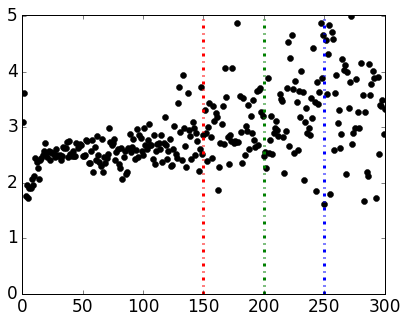

In [78]:
x_range = np.linspace(1, 300, 300)

fig, ax = plt.subplots(1, 1, figsize=(6.5, 5))
ax.plot(x_range, avg12, 'o', color='black')
ax.tick_params(labelsize=17)
y_range = np.linspace(0, 5, 100)
ax.plot(np.ones(100)*150, y_range, 'r-.', linewidth=3)
ax.plot(np.ones(100)*200, y_range, 'g-.', linewidth=3)
ax.plot(np.ones(100)*250, y_range, 'b-.', linewidth=3)
ax.set_xlim([0, max(x_range)])
ax.set_ylim([0, max(avg1)+0.2])
#ax.legend(fontsize=14)
#ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
fig.savefig("/Users/PureMac/Desktop/piece7", dpi=100)
plt.show()